## Para calcular el área bajo la curva (datos de verano):

In [15]:
import pandas as pd
import os
import numpy as np
from scipy.interpolate import interp1d
import math
import matplotlib.pyplot as plt
import pprint

In [16]:
os.getcwd()

'/datos/Practica_final_equipos'

### Generamos el DataFrame con los datos por segundo:

In [17]:
data_segundos = pd.read_csv("Verano_16.csv")

In [18]:
data_segundos.head()

,Hora,Demanda,Unnamed: 2,Unnamed: 3,03OCC .CR-CARGA AREA .AV
0,20-jun-19 00:00:00,8544.239258,NaN,NaN,6/20/19 0:00
1,20-jun-19 00:00:02,8538.705078,NaN,NaN,6/21/19 0:00
2,20-jun-19 00:00:04,8556.333008,NaN,NaN,2 s
3,20-jun-19 00:00:06,8563.195312,NaN,NaN,NaN
4,20-jun-19 00:00:08,8559.343750,NaN,NaN,NaN


In [19]:
seg = np.linspace(0, 86400, 43201)
print(seg)

[0.0000e+00 2.0000e+00 4.0000e+00 ... 8.6396e+04 8.6398e+04 8.6400e+04]


In [20]:
len(seg)

43201

In [21]:
a_seg = np.array(seg)
print(a_seg)

[0.0000e+00 2.0000e+00 4.0000e+00 ... 8.6396e+04 8.6398e+04 8.6400e+04]


In [22]:
data_seg = pd.DataFrame(seg, columns = ["Segundo"]) 
data_seg

,Segundo
0,0.0
1,2.0
2,4.0
3,6.0
4,8.0
...,...
43196,86392.0
43197,86394.0
43198,86396.0
43199,86398.0


In [23]:
DEM = pd.DataFrame(data_segundos.Demanda, columns = ["Demanda"])
DEM

,Demanda
0,8544.239258
1,8538.705078
2,8556.333008
3,8563.195312
4,8559.343750
...,...
43196,8599.916992
43197,8610.962891
43198,8610.962891
43199,8605.673828


Así se ve el DataFrame al final:

In [34]:
data_seg["Demanda"] = DEM["Demanda"]
data_seg

,Segundo,Demanda
0,0.0,8544.239258
1,2.0,8538.705078
2,4.0,8556.333008
3,6.0,8563.195312
4,8.0,8559.343750
...,...,...
43196,86392.0,8599.916992
43197,86394.0,8610.962891
43198,86396.0,8610.962891
43199,86398.0,8605.673828


#### Calculando área bajo la curva usando trapz:

In [28]:
dem_trapz1 = np.trapz(data_seg.Demanda)
dem_trapz2 = np.trapz(data_seg.Demanda, data_seg.Segundo)
print(f"{dem_trapz1:,.2f}")
print(f"{dem_trapz2:,.2f}")

380,928,010.37
761,856,020.75


#### Calculando área bajo la curva usando promedio de altura mínima y máxima:

In [29]:
dem = data_seg["Demanda"]
dem_max = dem.max()
dem_min = dem.min()
print("Max: ", f"{dem_max:,.2f}")
print("Min: ", f"{dem_min:,.2f}")

Max:  10,046.81
Min:  7,395.98


In [30]:
dem_prom = ((dem_max+dem_min)/2)*86400
print(f"{dem_prom:,.2f}")

753,528,487.50


#### Diferencia en porcentajes de datos de 1 día, usando trapz y considerando promedio de mínimo y máximo:

In [80]:
dif = dem_trapz2 - dem_prom
dif_pc = dif*100/dem_trapz2
print("El cálculo cada 2 segundos arroja un área", f"{dif_pc:,.2f}", "% mayor, que considerando el promedio del mínimo y máximo diario.")

El cálculo cada 2 segundos arroja un área 1.09 % mayor, que considerando el promedio del mínimo y máximo diario.


### Graficando:

In [67]:
#Puntos para graficar:
x_values = [0,24]
y_max = [dem_max, dem_max]
y_min = [dem_min, dem_min]
y_prom = [(dem_max+dem_min)/2, (dem_max+dem_min)/2]

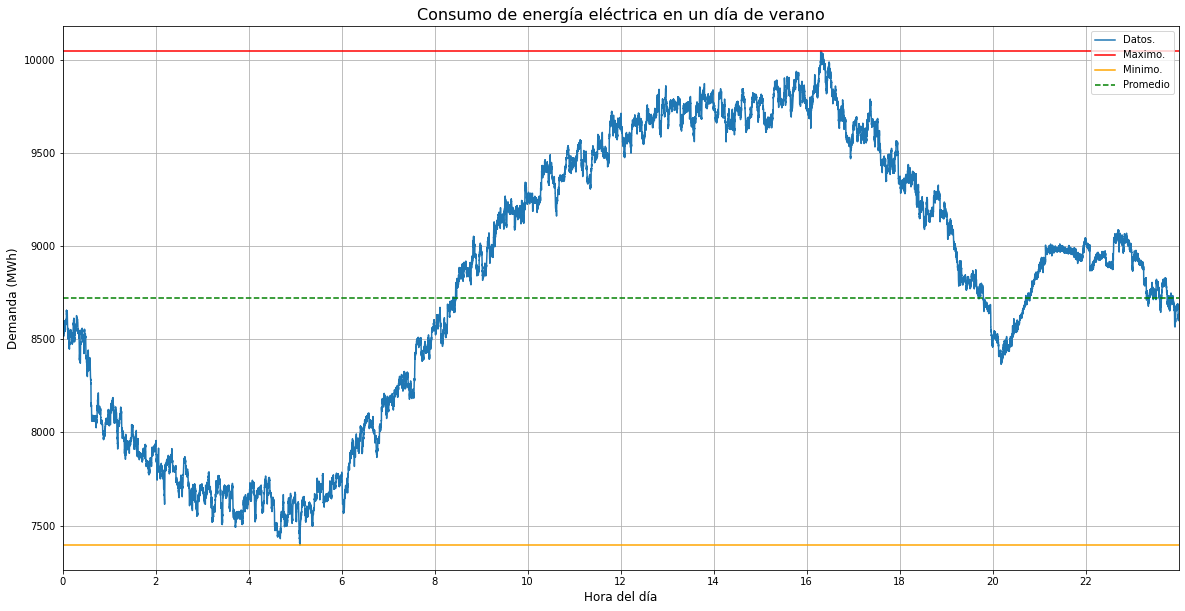

In [79]:
fig = plt.figure(figsize=(20,10))
plt.plot((data_seg.Segundo/3600), data_seg.Demanda)
plt.title("Consumo de energía eléctrica en un día de verano", fontsize = 16)
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, step=2))
plt.xlabel('Hora del día', fontsize = 12)
plt.ylabel('Demanda (MWh)', fontsize= 12)
plt.plot(x_values,y_max, color = "red")
plt.plot(x_values,y_min, color = "orange")
plt.plot(x_values,y_prom, "g--")
plt.legend(['Datos.','Maximo.',"Minimo.","Promedio"], loc=1)
plt.grid(True)
plt.show()